# Project Introduction

***Projects Overview***

*Project* ini membahas tentang penerapan *Supervised Machine Learning*, yaitu metode *Classification*. Algoritma model klasifikasi yang digunakan adalah Logistic Regression, K-Nearest Neighbors, Support Vector Machine (SVM), Decision Tree, dan Naive Bayes. Tujuan dari *project* ini adalah ***ensemble***, yaitu mencari model prediksi klasifikasi terbaik dari beberapa algoritma model yang digunakan untuk prediksi. Data yang digunakan dalam *project* ini adalah data dokumentasi kondisi pasien penderita penyakit Kardiovaskular. Dataset ini terdiri dari 299 baris dan 13 kolom yang dapat diakses [di sini](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). Kolom `DEATH_EVENT` akan menjadi target untuk prediksi ini. Jadi, objektif dari *project* ini adalah berdasarkan kolom atau fitur yang terdapat dalam data, dapat diprediksi apakah seorang pasien tersebut diperkirakan akan menerima risiko kematian akibat gagal jantung/penyakit Kardiovaskular atau tidak. 


***Description***

Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global,diperkirakan merenggut 17,9 juta jiwa setiap tahun,yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi. Orang dengan penyakit kardiovaskular atau yang berisiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.


***Attribute Information:***
1. `age` - umur pasien
2. `anaemia` - apakah ada pengurangan haemoglobin
3. `creatinine_phosphokinase` - level enzim CPK dalam mcg/L
4. `diabetes` - apakah pasien punya riwayat diabetes
5. `ejection_fraction` - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. `high_blood_pressure` - apakah pasien punya darah tinggi
7. `platelets` - jumlah platelet di darah dalam kiloplatelets/mL
8. `serum_creatinine` - level serum creatinine di darah dalam mg/dL
9. `serum_sodium` - level serum sodium di darah dalam mEq/L
10. `sex` - apakah pasien pria atau wanita
11. `smoking` - apakah pasien merokok
12. `time` - waktu dalam hari untuk follow-up
13. `DEATH_EVENT` - apakah pasien sudah meninggal saat waktu follow-up


***Sumber***  
https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25597242-final-project-3-ensemble
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

# Import Pustaka yang dibutuhkan

In [28]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Data Loading

In [2]:
heart_failure = pd.read_csv("dataset/heart_failure_clinical_records_dataset.csv")
df = heart_failure.copy()

In [3]:
# 5 data pertama
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# 5 data terakhir
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
# Dimensi dari dataset
print(df.shape)

# Ringkasan data/tipe data setiap kolom
print(df.info())

(299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


Berdasarkan keterangan diatas, dataset terdiri dari 299 baris dan 13 kolom. Terdapat 3 tipe data yang memiliki tipe *float* dan 10 tipe data dengan tipe *integer*.

# Data Cleaning

Bagian ini berisi proses penyiapan data berupa *data cleaning* sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah dalam data terdapat nilai yang hilang atau *missing values*, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data.

In [6]:
# Cek apakah terdapat missing values atau tidak
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
# Cek apakah terdapat duplikasi pada data atau tidak
df.duplicated().sum()

0

Berdasarkan keterangan diatas, terlihat bahwa tidak ada *missing values* atau data yang hilang dalam kumpulan data. Serta tidak terdapat duplikasi pada keseluruhan data.

In [5]:
# Mengganti nama kolom yang typo
df.rename(columns= {"anaemia":"anemia", "DEATH_EVENT":"target"}, inplace = True)

# Eksplorasi Data

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

## Korelasi antar fitur/kolom

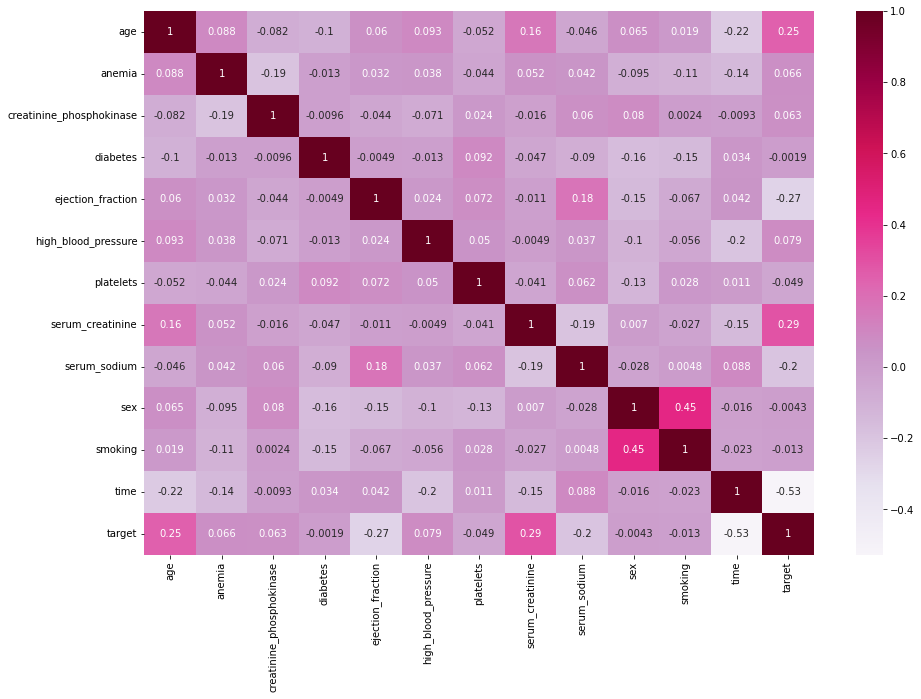

In [9]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="PuRd")

Cek kembali dengan df.corr() untuk melihat hasil dari fitur satu dengan fitur lainnya yang sama.

In [10]:
df.corr()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Berdasarkan plot di atas, diketahui bahwa semua fitur atau kolom dalam data memiliki korelasi atau hubungan yang cenderung rendah dengan kolom target. Kolom `age` atau umur memiliki koefisien korelasi positif cenderung rendah yaitu sebesar 0.25. Artinya semakin tua umur pasien, maka risiko kematian akibat penyakit jantung semakin tinggi pula. Kolom `ejection_fraction` dan `serum_sodium` memiliki nilai koefisien korelasi yang negatif cenderung rendah dengan kolom target yaitu berturut-turut sebesar -0.27 dan -0.2. Berarti semakin rendah persentase darah yang keluar jantung dan level serum sodium, akan diikuti dengan tingginya risiko kematian akibat penyakit jantung. Selain itu, kolom `serum_creatinne` dengan kolom target memiliki koefisien korelasi positif yang cenderung rendah yaitu sebesar 0.29. Ini dapat diartikan bahwa semakin tinggi level serum creatinne dalam tubuh pasien, maka risiko kematian akibat penyakit jantung semakin tinggi pula. Kolom `time` memiliki koefisien korelasi negatif cenderung tinggi yaitu sebesar -0.53. Ini dapat diartikan bahwa semakin banyak hari untuk *follow-up* kondisi pasien, maka risiko kematian akan semakin rendah. Untuk kolom atau fitur lain seperti `anemia`, `creatinine_phosphokinase`, `diabetes`, `high_blood_pressure`, `platelets`, `sex`, dan `smoking` tidak memiliki korelasi yang signifikan yaitu 0.00 dengan kolom target. 

## Statistik deskriptif dan distribusi masing-masing fitur/kolom

Melihat beberapa rincian statistik masing-masing fitur/kolom.

In [11]:
df.describe()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Memeriksa distribusi data menggunakan Histogram.

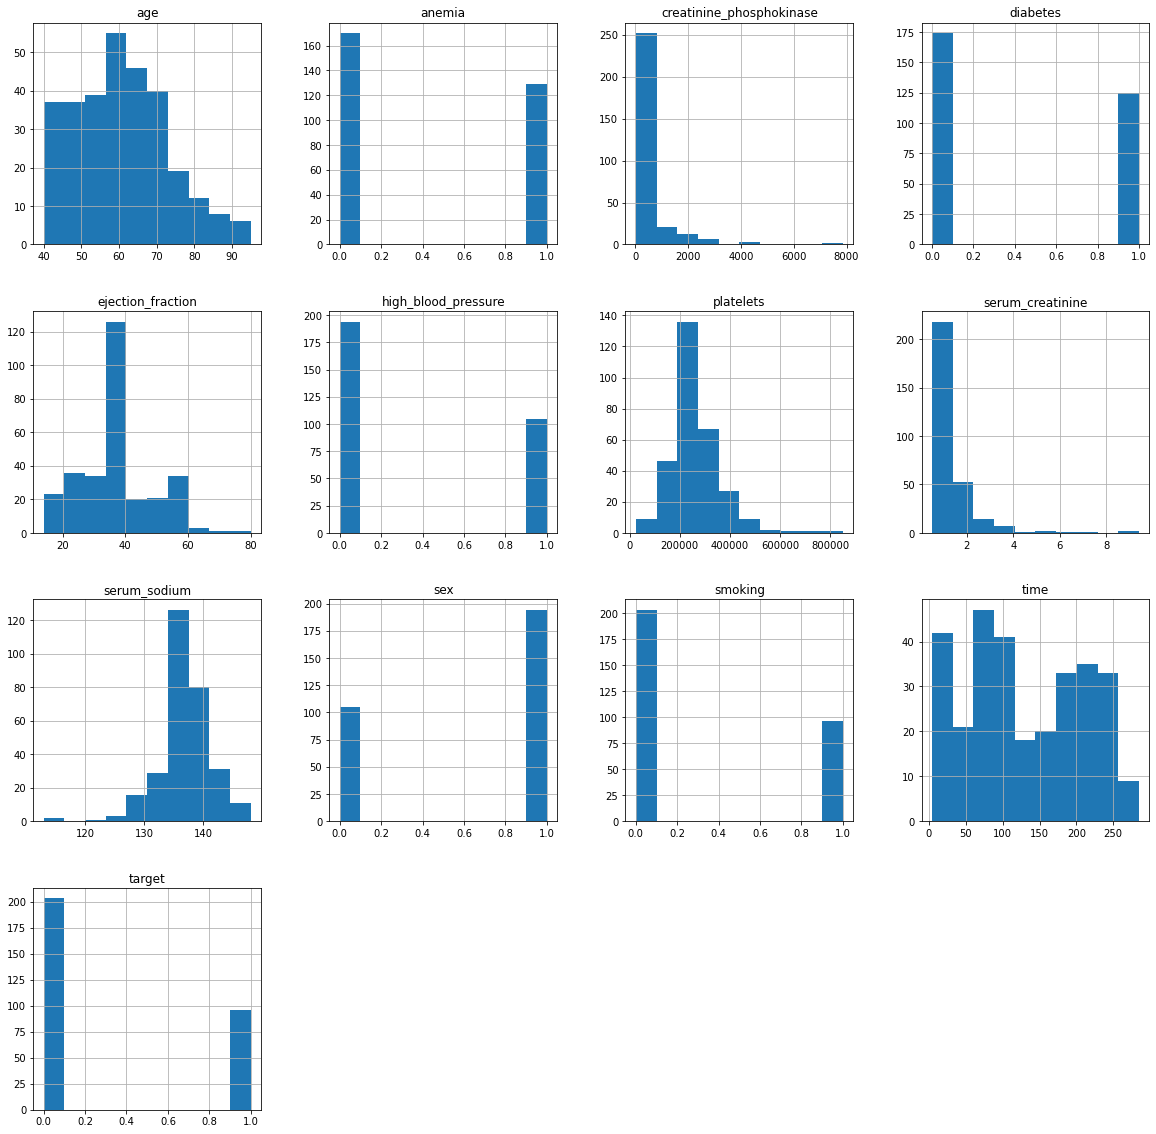

In [12]:
df.hist(figsize=(20, 20))
plt.show()

Berdasarkan plot diatas, terlihat secara grafis bahwa hampir setiap variabel atau fitur tidak memiliki distribusi atau penyebaran yang normal. Selain itu, dapat dilihat berdasarkan plot distribusi juga umur pasien yang tercatat dalam data yang memiliki frekuensi tertinggi yaitu sekitar umur 55-65 tahun.

Menghitung kecondongan set data, yang menggambarkan simetri set data tersebut terhadap rata-ratanya.

In [13]:
df.skew()

age                         0.423062
anemia                      0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
target                      0.770349
dtype: float64

Berdasarkan hasil diatas, terlihat bahwa kolom `creatinine_phosphokinase` dan `serum_creatinine` memiliki nilai kemiringan atau *skewness* tertinggi. Artinya kedua kolom tersebut memiliki nilai modus dan median yang lebih rendah dibanding nilai rata-ratanya. Selain itu, kolom `serum_sodium` dan `sex` memiliki nilai kemiringan atau *skewness* negatif, yang artinya nilai modus dan median lebih tinggi dibanding nilai rata-ratanya.

## Uji normalitas data

Selanjutnya akan diperiksa apakah data terdistribusi dengan normal atau tidak.

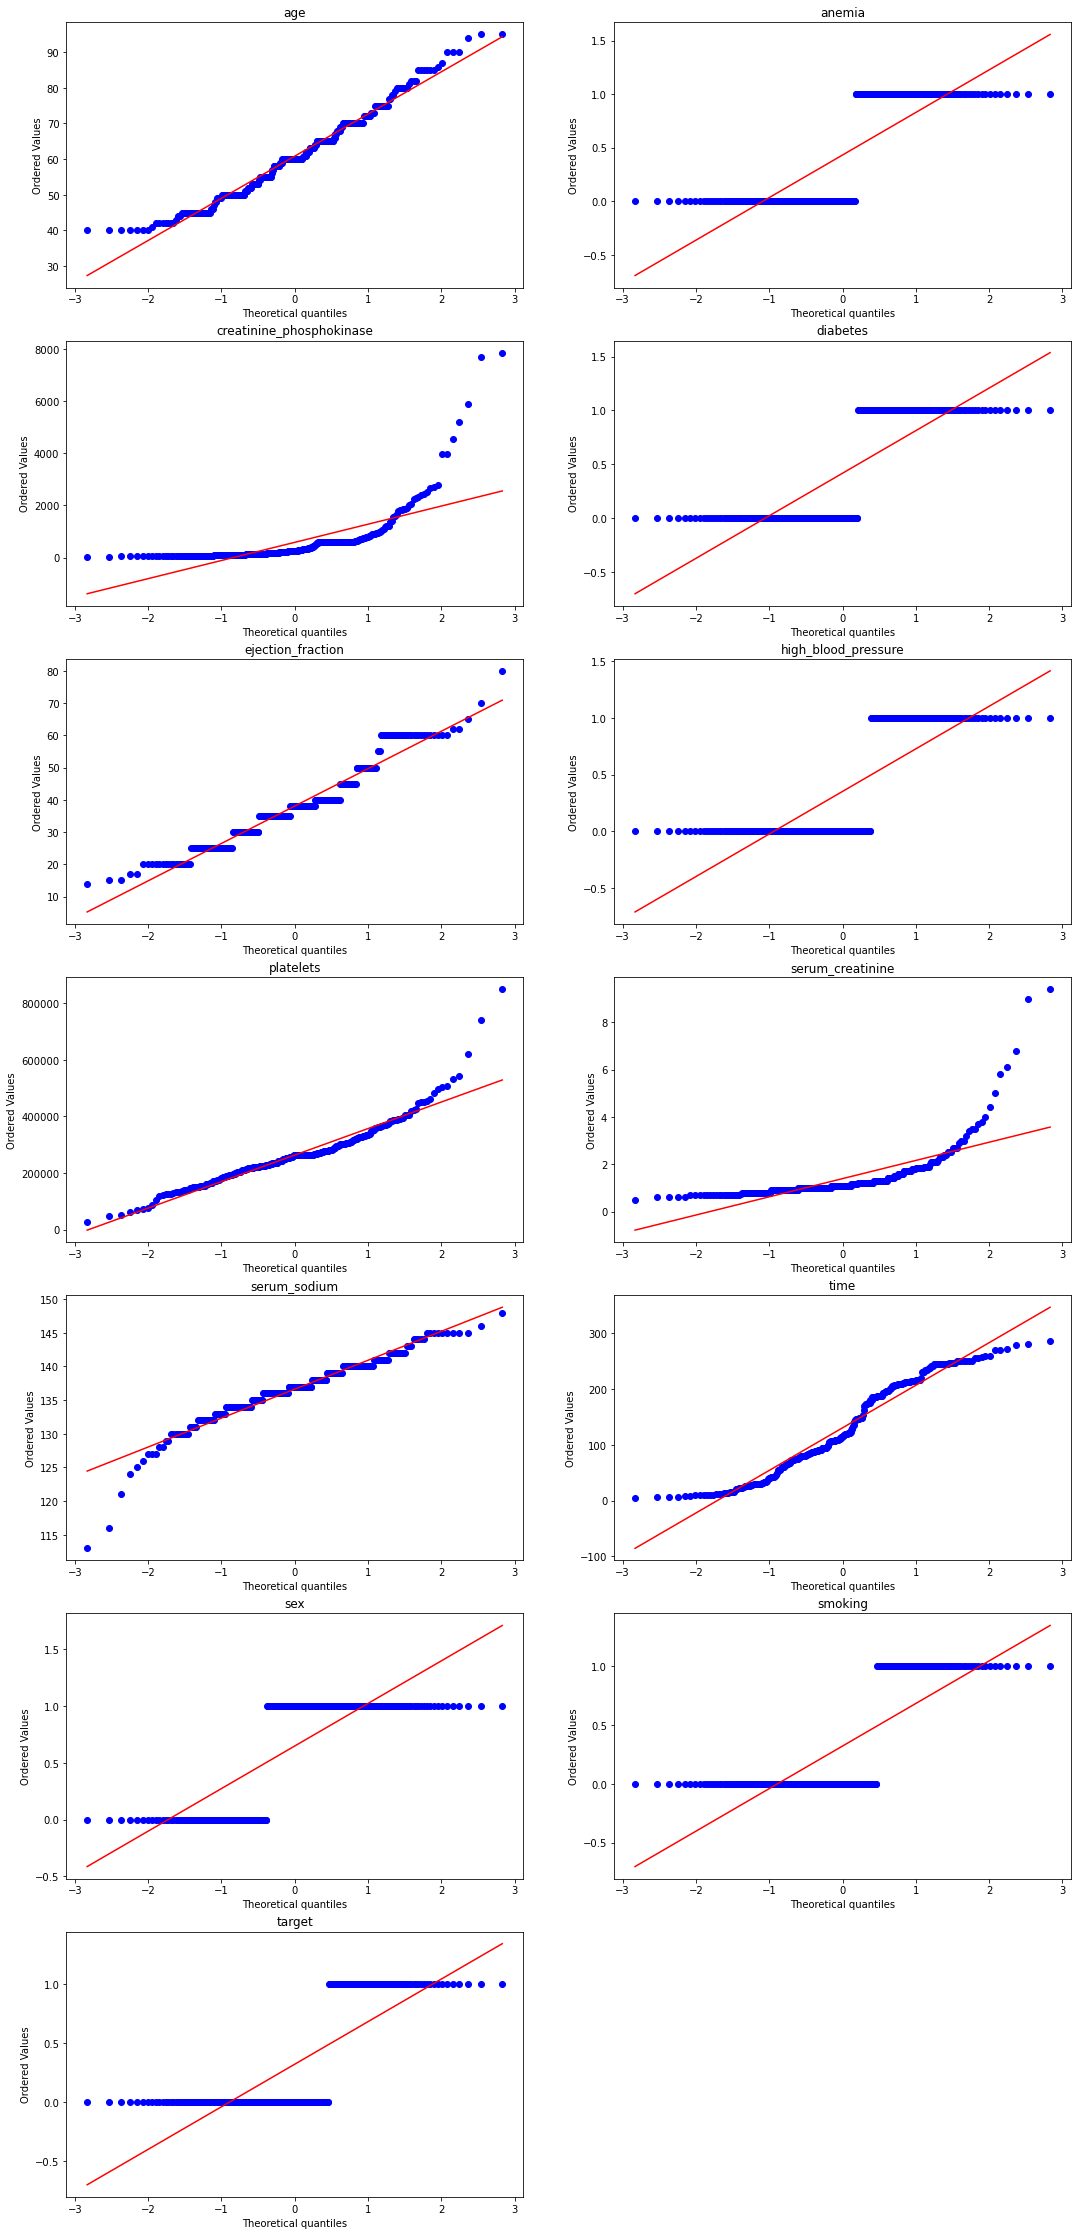

In [14]:
# Variable names
columns = ["age", "anemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "time", "sex", "smoking", "target"]

# Create the plot
plt.figure(figsize=(18, 40))

for i in range(1, 14):
    plt.subplot(7, 2, i)
    stats.probplot(df[columns[i-1]], dist="norm", plot=plt)
    plt.title(columns[i-1])

Berdasarkan plot diatas, dapat diketahu bahwa secara grafis, masing-masing kolom atau fitur memiliki titik menyebar diantara garis merah atau yang disebut dengan garis normal. Untuk kolom `anemia`, `diabetes`, `high_blood_pressure`, `sex`, `smoking`, dan `target` adalah kolom kategorik.

## Jumlah masing-masing nilai unik pada kolom target

Melihat nilai unik pada variabel `target`.

In [15]:
df["target"].unique()

array([1, 0], dtype=int64)

Terlihat bahwa pada variabel target terdapat 2 unik yaitu 1 dan 0. Dimana `1` merupakan jumlah orang yang memliki risiko kematian akibat penyakit jantung dan `0` merupakan jumlah orang yang tidak memiliki risiko kematian akibat penyakit jantung.

Jumlah pasien yang memiliki risiko kematian akibat penyakit jantung: 96 (32.11%)
Jumlah pasien yang tidak memiliki risiko kematian akibat penyakit jantung: 203 (67.89%)


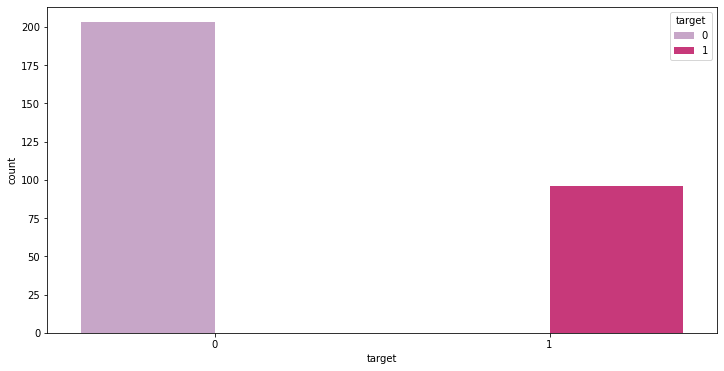

In [16]:
# Memeriksa distribusi target
num_heart_failure = len(df)
num_true = len(df.loc[df["target"] == 1])
num_false = len(df.loc[df["target"] == 0])
print("Jumlah pasien yang memiliki risiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(num_true, (num_true/num_heart_failure)*100))
print("Jumlah pasien yang tidak memiliki risiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(num_false, (num_false/num_heart_failure)*100))

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="target", hue="target", data=df, palette="PuRd")

## Distribusi umur pasien dengan risiko kematian

Rata-rata usia pasien adalah 60.83


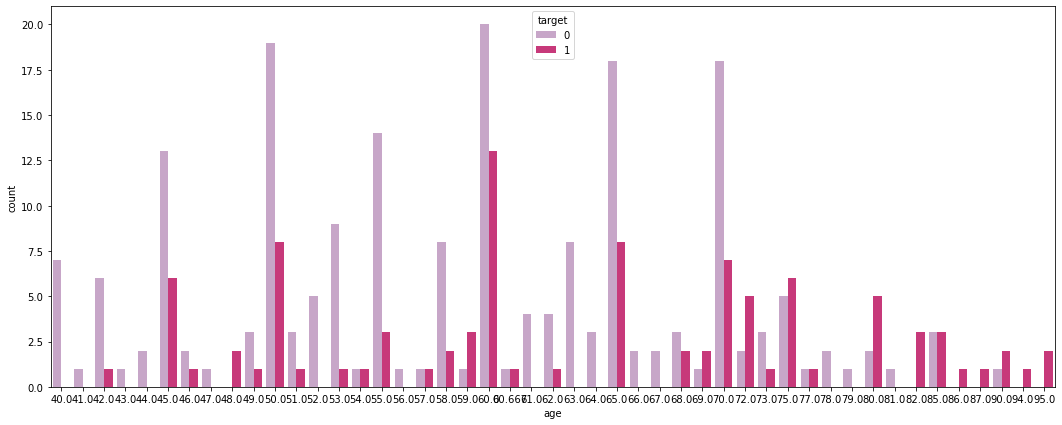

In [17]:
plt.figure(figsize=(18,7))
ax = sns.countplot(x="age", hue="target", data=df, palette="PuRd")

mean_de = df["age"].mean()
print("Rata-rata usia pasien adalah {:.2f}".format(mean_de))

Berdasarkan plot diatas, dapat dilihat bahwa usia 60 tahun adalah usia yang memiliki risiko kematian akibat penyakit jantung paling tinggi. Selain itu, dapat dilihat juga bahwa umur pasien cenderung mempengaruhi ada tidaknya risiko kematian karena umur di bawah 45 tahun memiliki risiko kematian yang rendah sedangkan di atas 50 tahun memiliki risiko kematian yang lebih tinggi.

Jumlah pasien berumur di atas 50 tahun yang memiliki risiko kematian :- 85
Jumlah pasien berumur di atas 50 tahun yang tidak memiliki risiko kematian:- 167


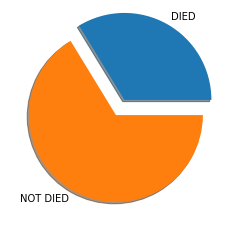

In [18]:
age_above_50_not_died = df['target'][df.age >=50][df.target == 0]
age_above_50_died = df['target'][df.age >= 50][df.target == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Jumlah pasien berumur di atas 50 tahun yang memiliki risiko kematian :- {len_died}')
print(f'Jumlah pasien berumur di atas 50 tahun yang tidak memiliki risiko kematian:- {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

Dapat dilihat juga berdasarkan *pie-chart* di atas bahwa pasien yang berumur di atas atau sama dengan 50 tahun yang memiliki risiko kematian dan yang tidak berisiko kematian memiliki perbandingan proporsi 1:2.

## Distribusi jenis kelamin pasien dengan risiko kematian

Jumlah pasien berjenis kelamin wanita: 105
Jumlah pasien berjenis kelamin pria: 194


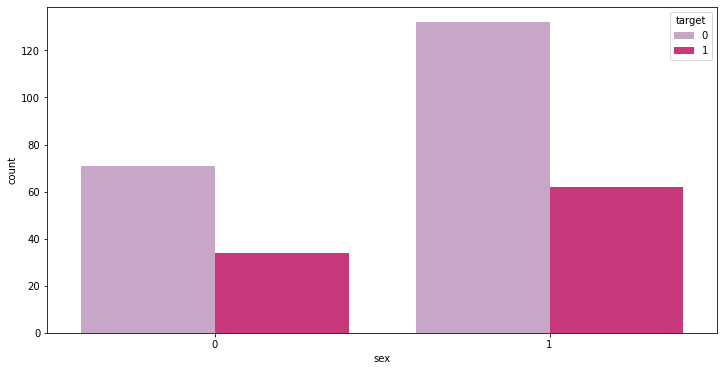

In [20]:
female = df['target'][df.sex == 0]
male = df['target'][df.sex == 1]

len_f = len(female)
len_m = len(male)

print(f'Jumlah pasien berjenis kelamin wanita: {len_f}')
print(f'Jumlah pasien berjenis kelamin pria: {len_m}')

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="sex", hue="target", data=df, palette="PuRd")

Berdasarkan plot diatas, dapat dilihat bahwa jumlah laki-laki (`1`) yang memiliki risiko kematian akibat penyakit jantung cenderung lebih banyak daripada wanita (`0`).

## Distribusi kolom `anemia`, `diabetes`, `high_blood_pressure`, `smoking`, dan `time` berdasarkan risiko kematian

<AxesSubplot:xlabel='time', ylabel='count'>

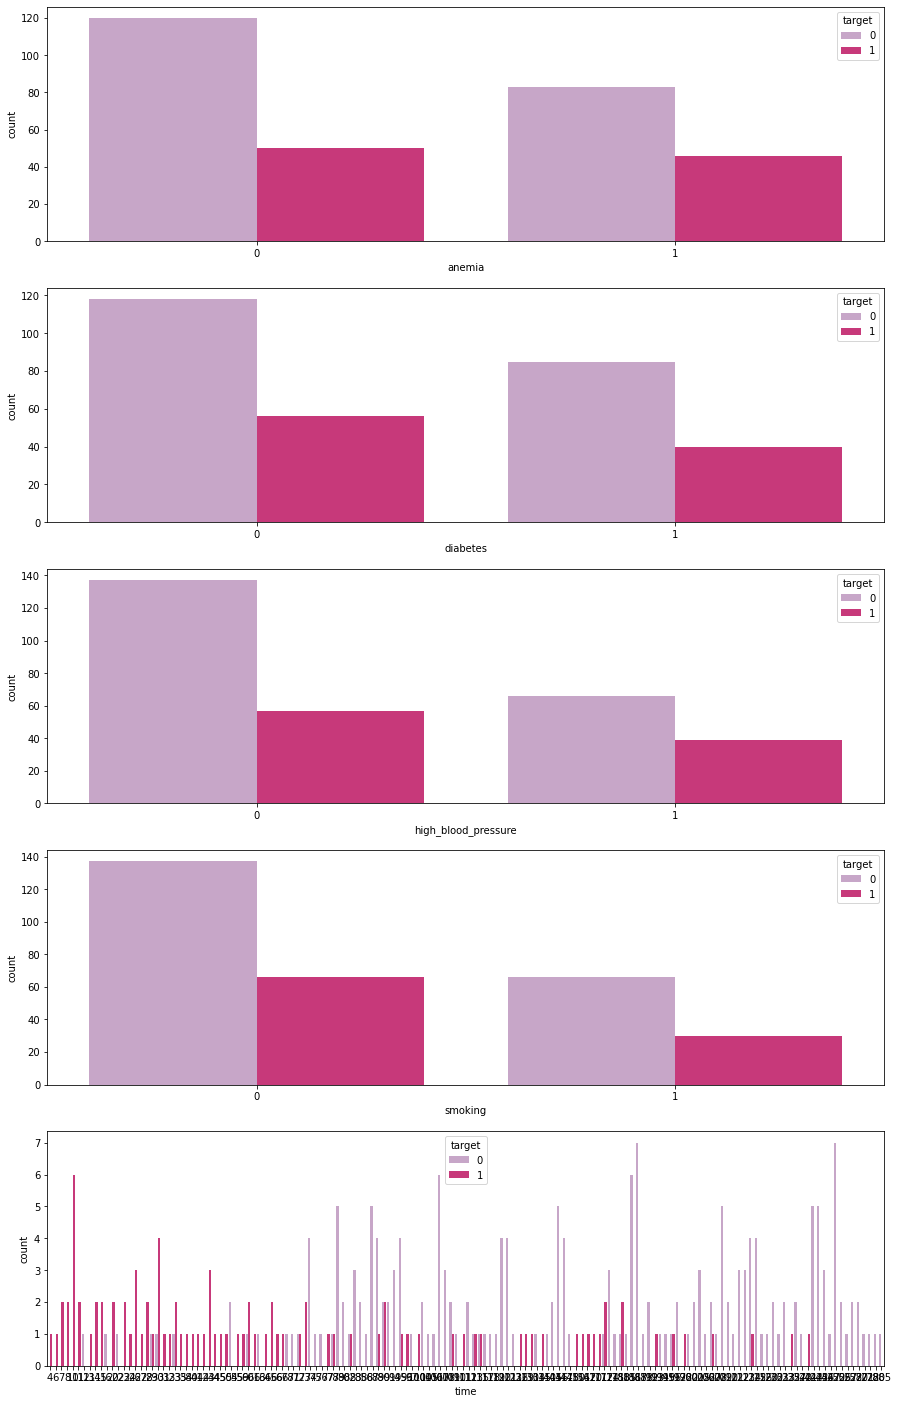

In [27]:
fig = plt.figure(figsize=(15,25))

ax0 = fig.add_subplot(5,1,1)
ax1 = fig.add_subplot(5,1,2)
ax2 = fig.add_subplot(5,1,3)
ax3 = fig.add_subplot(5,1,4)
ax4 = fig.add_subplot(5,1,5)

sns.countplot(x="anemia", hue="target", data=df, palette="PuRd", ax=ax0)
sns.countplot(x="diabetes", hue="target", data=df, palette="PuRd", ax=ax1)
sns.countplot(x="high_blood_pressure", hue="target", data=df, palette="PuRd", ax=ax2)
sns.countplot(x="smoking", hue="target", data=df, palette="PuRd", ax=ax3)
sns.countplot(x="time", hue="target", data=df, palette="PuRd", ax=ax4)

Berdasarkan plot di atas, masing-masing kolom tidak menunjukkan adanya pengaruh yang signifikan terhadap risiko kematian akibat penyakit jantung, baik itu penderita anemia, diabetes, darah tinggi, dan perokok. Namun, untuk kolom `time` atau waktu *follow-up* pasien menunjukkan bahwa semakin sedikit waktu *follow-up*, maka risiko kematian akibat penyakit jantung semakin tinggi dikarenakan kurangnya kontrol kondisi kesehatan atau kondisi vital pasien.

# Data Preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pelatihan model prediksi klasifikasi.

In [54]:
data = df.copy()

In [7]:
#Memisahkan/memecah data
age = data["age"]
anemia = data["anemia"]
creatinine_phosphokinase = data["creatinine_phosphokinase"]
diabetes = data["diabetes"]
ejection_fraction = data["ejection_fraction"]
high_blood_pressure = data["high_blood_pressure"]
platelets = data["platelets"]
serum_creatinine = data["serum_creatinine"]
serum_sodium = data["serum_sodium"]
sex = data["sex"]
smoking = data["smoking"]
time = data["time"]
target = data["target"]

Visualisasi nilai statistik masing-masing kolom menggunakan boxplot.

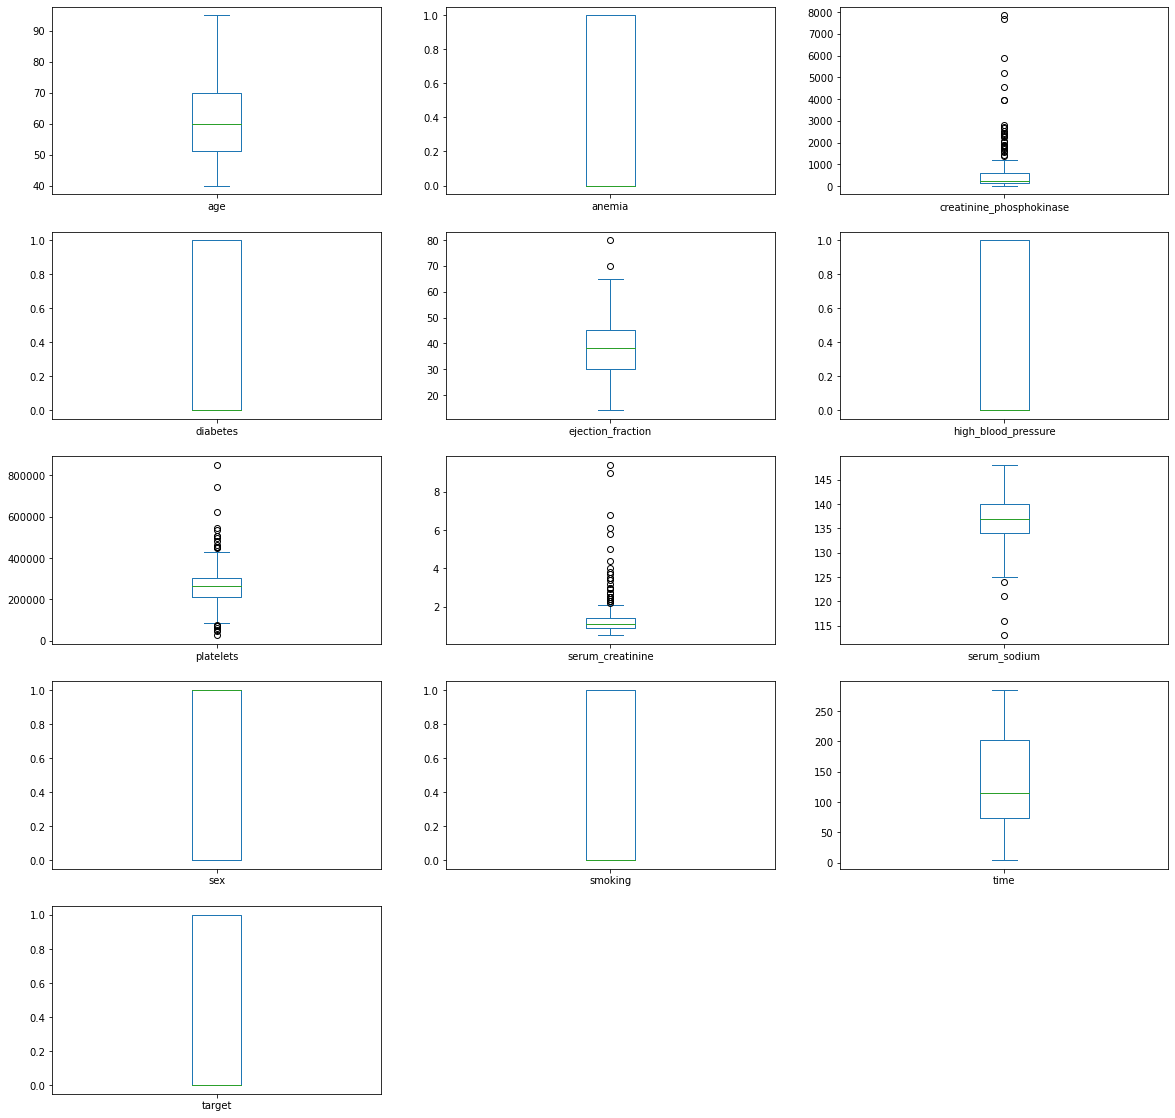

In [30]:
fig = plt.figure(figsize=(20,20))

ax0 = fig.add_subplot(5,3,1)
ax1 = fig.add_subplot(5,3,2)
ax2 = fig.add_subplot(5,3,3)
ax3 = fig.add_subplot(5,3,4)
ax4 = fig.add_subplot(5,3,5)
ax5 = fig.add_subplot(5,3,6)
ax6 = fig.add_subplot(5,3,7)
ax7 = fig.add_subplot(5,3,8)
ax8 = fig.add_subplot(5,3,9)
ax9 = fig.add_subplot(5,3,10)
ax10 = fig.add_subplot(5,3,11)
ax11 = fig.add_subplot(5,3,12)
ax12 = fig.add_subplot(5,3,13)

age.plot(kind="box", ax=ax0)
anemia.plot(kind="box", ax=ax1)
creatinine_phosphokinase.plot(kind="box", ax=ax2)
diabetes.plot(kind="box", ax=ax3)
ejection_fraction.plot(kind="box", ax=ax4)
high_blood_pressure.plot(kind="box", ax=ax5)
platelets.plot(kind="box", ax=ax6)
serum_creatinine.plot(kind="box", ax=ax7)
serum_sodium.plot(kind="box", ax=ax8)
sex.plot(kind="box", ax=ax9)
smoking.plot(kind="box", ax=ax10)
time.plot(kind="box", ax=ax11)
target.plot(kind="box", ax=ax12)

plt.show()

## Standarisasi data

Standardisasi adalah proses mengubah data sedemikian rupa sehingga *mean* tiap variabel menjadi sama dengan nol, dan *standard deviation* tiap variabel adalah satu. Dengan begitu, akan didapatkan skala yang sama untuk semua variabel. Standarisasi juga dilakukan karena banyaknya *outlier* atau pecilan pada data.

In [53]:
scaler = StandardScaler()

In [55]:
scaler.fit(data.drop('target',axis = 1))
scaled_features = scaler.transform(data.drop('target',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


## Membagi Data

Membagi data *training* dan *testing* dengan rasio 80:20

In [56]:
X = df_feat
y = data["target"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
print("Training set sebesar {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("Test set sebesar {0:0.2f}%".format(len(X_test)/len(df.index)*100))

Training set sebesar 69.90%
Test set sebesar 30.10%


In [61]:
print('Jumlah training set:', len(X_train))
print('Jumlah testing set:', len(X_test))

Jumlah training set: 209
Jumlah testing set: 90


In [62]:
print("Jumlah pasien berisiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(len(df.loc[df["target"] == 1]), (len(df.loc[df["target"]==1])/len(df.index))*100.0))
print("Jumlah pasien yang tidak berisiko kematian akibat penyakit Jantung: {0} ({1:2.2f}%)\n".format(len(df.loc[df["target"] == 0]), (len(df.loc[df["target"] == 0])/len(df.index))*100.0))

print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False: {0} ({1:2.2f}%)\n".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)*100.0)))

print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

Jumlah pasien berisiko kematian akibat penyakit jantung: 96 (32.11%)
Jumlah pasien yang tidak berisiko kematian akibat penyakit Jantung: 203 (67.89%)

Training True: 68 (32.54%)
Training False: 141 (67.46%)

Testing True: 28 (31.11%)
Testing False: 62 (68.89%)


# Pendefinisian Model

## Logistic Regression

In [63]:
model_lr = LogisticRegression()
model_lr

LogisticRegression()

## K-Nearest Neighbors

In [64]:
model_knn = KNeighborsClassifier()

## Support Vector Machine

In [65]:
model_svm = SVC()
model_svm

SVC()

## Decision Tree

In [66]:
model_tree = DecisionTreeClassifier()
model_tree

DecisionTreeClassifier()

## Random Forest

In [67]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf

RandomForestClassifier(n_estimators=200)

## Naive Bayes

In [68]:
model_nb = GaussianNB()
model_nb

GaussianNB()

# Pelatihan Model

## Logistic Regression

In [69]:
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

## K-Nearest Neighbors

In [70]:
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

## Support Vector Machine

In [71]:
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

## Decision Tree

In [72]:
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

## Random Forest

In [73]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

## Naive Bayes

In [74]:
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Model

## Logistic Regression

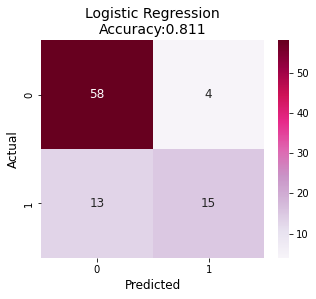

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87        62
           1       0.79      0.54      0.64        28

    accuracy                           0.81        90
   macro avg       0.80      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90

Accuracy Score:- 0.8111111111111111
Precision Score:- 0.7894736842105263
Recall Score:- 0.5357142857142857


In [75]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')

## K-Nearest Neighbors

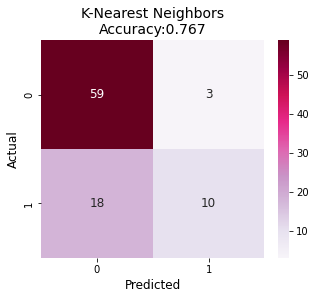

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85        62
           1       0.77      0.36      0.49        28

    accuracy                           0.77        90
   macro avg       0.77      0.65      0.67        90
weighted avg       0.77      0.77      0.74        90

Accuracy Score:- 0.7666666666666667
Precision Score:- 0.7692307692307693
Recall Score:- 0.35714285714285715


In [76]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_knn)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_knn)}')

## Support Vector Machine

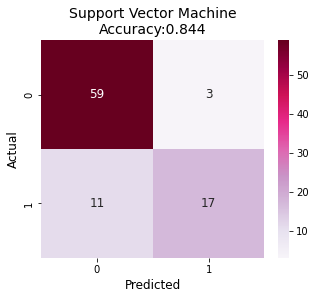

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        62
           1       0.85      0.61      0.71        28

    accuracy                           0.84        90
   macro avg       0.85      0.78      0.80        90
weighted avg       0.85      0.84      0.84        90

Accuracy Score:- 0.8444444444444444
Precision Score:- 0.85
Recall Score:- 0.6071428571428571


In [77]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Support Vector Machine\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_svm)}')

## Decision Tree

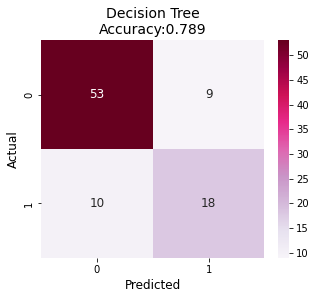

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        62
           1       0.67      0.64      0.65        28

    accuracy                           0.79        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.79      0.79      0.79        90

Accuracy Score:- 0.7888888888888889
Precision Score:- 0.6666666666666666
Recall Score:- 0.6428571428571429


In [78]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_tree)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_tree)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_tree)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_tree)}')

## Random Forest

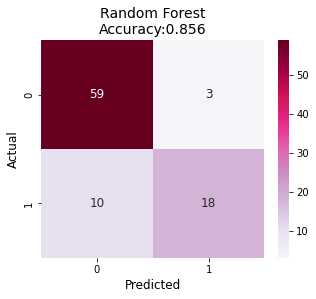

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        62
           1       0.86      0.64      0.73        28

    accuracy                           0.86        90
   macro avg       0.86      0.80      0.82        90
weighted avg       0.86      0.86      0.85        90

Accuracy Score:- 0.8555555555555555
Precision Score:- 0.8571428571428571
Recall Score:- 0.6428571428571429


In [79]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_rf)}')

## Naive Bayes

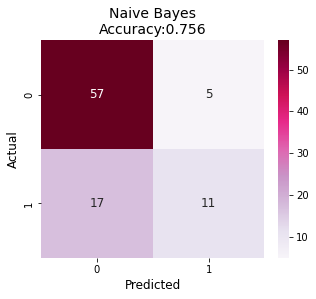

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        62
           1       0.69      0.39      0.50        28

    accuracy                           0.76        90
   macro avg       0.73      0.66      0.67        90
weighted avg       0.74      0.76      0.73        90

Accuracy Score:- 0.7555555555555555
Precision Score:- 0.6875
Recall Score:- 0.39285714285714285


In [80]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_nb)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_nb)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_nb)}')

---
Dari model yang telah dibuat berdasarkan macam-macam algoritma klasifikasi, bahwa algoritma klasifikasi Random Forest memiliki performa model yang paling baik diantara algoritma klasifikasi yang lain. Algoritma Random Forest memiliki nilai akurasi sebesar 85%, nilai precision sebesar 0.86, recall sebesar 0.64, dan f1-score sebesar 0.73.

# Feature Importance

Setelah mendapatkan model prediksi klasifikasi terbaik, akan dicek *feature importance* dari data, yaitu mengetahui fitur/kolom mana saja yang paling berpengaruh untuk menentukan prediksi target.

In [180]:
data2 = data.copy()
data2.drop("target", axis=1, inplace=True)
feature_names = list(data2.columns.values)

In [175]:
feature_imp = pd.Series(model_rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

time                        0.320623
ejection_fraction           0.139253
serum_creatinine            0.117296
age                         0.107405
creatinine_phosphokinase    0.091486
platelets                   0.084201
serum_sodium                0.075700
anemia                      0.016905
sex                         0.013690
high_blood_pressure         0.012960
diabetes                    0.011725
smoking                     0.008756
dtype: float64

Pada algoritma RandomForestClassifier, terdapat perhitungan untuk mengukur feature importances. Dapat dilihat bahwa 3 variabel yang memiliki nilai *feature importance* paling tinggi yaitu `time`, `serum_creatinie`, `ejection_fraction`.

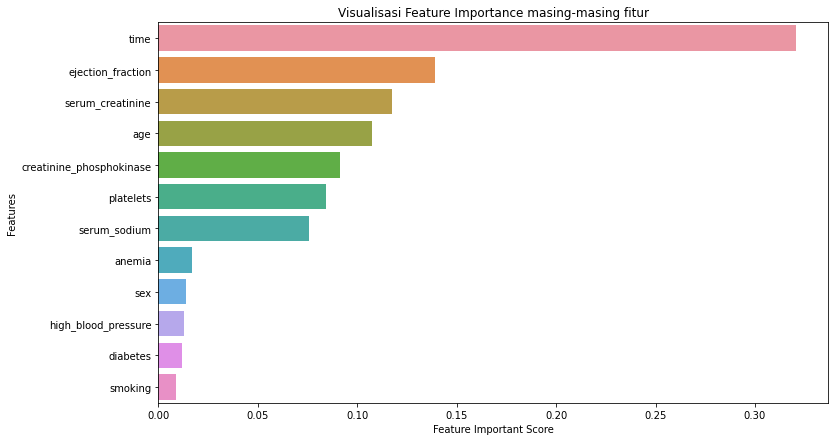

In [176]:
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")

plt.show()

Memilih variabel atau kolom dengan *feature importance score* tertinggi.

In [181]:
data2 = data2.drop(['anemia','sex','diabetes','high_blood_pressure','smoking'], axis=1)

In [183]:
scaler_ = StandardScaler()
scaler_.fit(data2)
scaled_features_ = scaler.transform(data2)
df_feat_ = pd.DataFrame(scaled_features_, columns = data2.columns)
df_feat_.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [184]:
X_ = df_feat_
y_ = data["target"]

In [185]:
# Membagi data testing dan data training
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=0)

In [186]:
# Pendefinisan model
model_rf_2 = RandomForestClassifier(n_estimators=100, random_state=0)

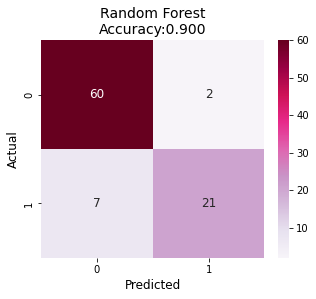

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        62
           1       0.91      0.75      0.82        28

    accuracy                           0.90        90
   macro avg       0.90      0.86      0.88        90
weighted avg       0.90      0.90      0.90        90



In [187]:
# Melatih data
model_rf_2.fit(X_train_, y_train_)
y_pred_rf_ = model_rf_2.predict(X_test_)

# Confusion Matrix
cm = confusion_matrix(y_test_, y_pred_rf_)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test_, y_pred_rf_)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test_, y_pred_rf_))

In [188]:
accuracy_score(y_test, y_pred_rf_)

0.9

Berdasarkan *output* di atas, didapat bahwa algoritma terbaik adalah Random Forest dan setelah dilakukan pengecekan *feature importance* dengan menambahkan parameter `random_state` pada model Random Forest didapat nilai akurasi akhir sebesar 90%, nilai precision sebesar 0.91, recall sebesa 0.75, dan f1-score sebesar 0.82. 

# Model Inference

In [162]:
X_.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


Untuk menguji keakuratan model, dilakukan *model inference* untuk menguji model dengan data di luar data yang tersedia.

Misal terdapat pasien yang berumur 58 tahun. Setelah dilakukan pemeriksaan, didapat hasil pemeriksaan sebagai berikut:
- Level enzim CPK sebesar 600 mcg/L
- Persentase darah yang keluar dari jantung setiap kontraksi (*ejection fraction*) sebesar 40 %
- Jumlah platelets dalam darah sebesar 200000 kiloplatelets/mL
- Level serum creatinine sebesar 2.0 mg/dL
- Level serum sodium sebesar 130 mEq/L

Pasien telah menjalani kontrol untuk *follow up* kondisi selama 10 hari. Apakah pasien memiliki risiko kematian akibat penyakit jantung?

In [193]:
age = int(input("Age:"))
c_p = float(input("Creatinine Phosphokinase Enzime Level:"))
e_f = float(input("Ejection Fraction Percentage:"))
plate = float(input("Platelets Level:"))
s_creatinine = float(input("Creatinine Serum Level:"))
s_sodium = float(input("Sodium Level:"))
time = int(input("Follow up control: "))

val = [age, c_p, e_f, plate, s_creatinine, s_sodium, time]
val = scaler_.transform([val])

print('Input values:', val)

val_predict = model_rf_2.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:58
Creatinine Phosphokinase Enzime Level:600
Ejection Fraction Percentage:40
Platelets Level:200000
Creatinine Serum Level:2.0
Sodium Level:130
Follow up control: 10
Input values: [[-0.2386456   0.01874802  0.16219911 -0.64889056  0.58688315 -1.50403612
  -1.55206738]]

Pasien memiliki risiko kematian akibat penyakit jantung


C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Misal terdapat pasien yang berumur 49 tahun. Setelah dilakukan pemeriksaan, didapat hasil pemeriksaan sebagai berikut:
- Level enzim CPK sebesar 100 mcg/L
- Persentase darah yang keluar dari jantung setiap kontraksi (*ejection fraction*) sebesar 28 %
- Jumlah platelets dalam darah sebesar 430000 kiloplatelets/mL
- Level serum creatinine sebesar 1.0 mg/dL
- Level serum sodium sebesar 125 mEq/L

Pasien telah menjalani kontrol untuk *follow up* kondisi selama 14 hari. Apakah pasien memiliki risiko kematian akibat penyakit jantung?

In [202]:
age = int(input("Age:"))
c_p = float(input("Creatinine Phosphokinase Enzime Level:"))
e_f = float(input("Ejection Fraction Percentage:"))
plate = float(input("Platelets Level:"))
s_creatinine = float(input("Creatinine Serum Level:"))
s_sodium = float(input("Sodium Level:"))
time = int(input("Follow up control: "))

val = [age, c_p, e_f, plate, s_creatinine, s_sodium, time]
val = scaler_.transform([val])

print('Input values:', val)

val_predict = model_rf_2.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:49
Creatinine Phosphokinase Enzime Level:100
Ejection Fraction Percentage:28
Platelets Level:430000
Creatinine Serum Level:1.0
Sodium Level:125
Follow up control: 14
Input values: [[-0.99654663 -0.49742685 -0.85345607  1.7066882  -0.38137852 -2.6390861
  -1.50044403]]

Pasien tidak memiliki risiko kematian akibat penyakit jantung


C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Shavira Zhalsabilla\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Conclusions

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:
1. *Project* ini berisikan tentang penerapan teknik Supervised Learning yaitu klasifikasi pada dataset dokumentasi kondisi pasien penderita penyakit Kardiovaskular. Dataset ini terdiri dari 299 baris dan 13 kolom yang dapat diakses [di sini](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). Kolom `DEATH_EVENT` akan menjadi target untuk prediksi ini. Jadi, objektif dari *project* ini adalah berdasarkan kolom atau fitur yang terdapat dalam data, dapat diprediksi apakah seorang pasien tersebut diperkirakan akan menerima risiko kematian akibat gagal jantung/penyakit Kardiovaskular atau tidak.
2. Diketahui bahwa variabel yang paling mempengaruhi dalam menentukan prediksi risiko kematian akibat penyakit jantung adalah: `time`, `ejection_fraction`, `serum_creatinine`, `age`, `creatinine_phosphokinase`, `platelets`, dan `serum_sodium`. Dalam hal ini, seberapa sering pasien melakukan *follow up* untuk kontrol kondisi sangat berpengaruh dalam penentuan ada tidaknya risiko kematian akibat penyakit jantung.
3. Pasien dengan umur di atas 50 tahun memiliki risiko kematian akibat penyakit jantung yang lebih tinggi.
3. Algoritma model klasifikasi yang digunakan adalah Logistic Regression, K-Nearest Neighbors, Support Vector Machine (SVM), Decision Tree, dan Naive Bayes. Berdasarkan pelatihan model yang sudah dilakukan, didapat bahwa model Random Forest adalah model dengan performa terbaik didapat nilai akurasi akhir sebesar 90%, nilai precision sebesar 0.91, recall sebesa 0.75, dan f1-score sebesar 0.82. 

# Save and Load Models

Pada tahap menyimpan serta membaca data ke dalam/dari sebuah file dapat digunakannya sebuah modul pickle.

In [207]:
pickle_file_dir = open("rf_model.pkl", "wb")

pickle.dump(model_rf_2, pickle_file_dir)
pickle_file_dir.close()

In [208]:
pickle_file_read = open("rf_model.pkl", "rb")
classifier = pickle.load(pickle_file_read)

In [210]:
read_classifier.predict(X_test_)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)